In [ ]:
from jmetal.problem import ZDT3
from jmetal.algorithm.multiobjective.gde3 import GDE3
from jmetal.util.termination_criterion import StoppingByEvaluations



# Imports

In [1]:
from jmetal.problem import ZDT3
from jmetal.algorithm.multiobjective.gde3 import GDE3
from jmetal.util.termination_criterion import StoppingByEvaluations

from pymoo.factory import get_problem
import matplotlib.pyplot as plt
import numpy as np

from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions

# Def de funções

In [37]:
def plot_zdt3_comparsion(algorithm_front, title):
    zdt3_dominant_solutions = get_problem("zdt3").pareto_front()
    zdt3_x = zdt3_dominant_solutions[:,0]
    zdt3_y = zdt3_dominant_solutions[:,1]
    
    algorithm_dominant_solutions = np.array([i.objectives for i in algorithm_front])
    algorithm_x = algorithm_dominant_solutions[:,0]
    algorithm_y = algorithm_dominant_solutions[:,1]

    plt.scatter(algorithm_x, algorithm_y, marker='X',s=20, facecolors='none', edgecolors='b')
    plt.scatter(zdt3_x, zdt3_y, marker='X',s=20, facecolors='none', edgecolors='r')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend(['GDE3 Dominant Solutions', 'ZDT3 Dominant Solutions'])
    plt.show()

In [38]:
def runner_gde3(problem, max_evaluations = 1000, 
                population_size=100, 
                crossover_rate=0.5, 
                convergency_rate=0.5):
    
    algorithm = GDE3(
        problem=problem,
        population_size=population_size,
        cr=crossover_rate,
        f=convergency_rate,
        termination_criterion=StoppingByEvaluations(max_evaluations)
    )

    algorithm.run()
    solutions = algorithm.get_result()
    return solutions

In [39]:
def zdt3_gde3_test(num_generations, convergency_rate):
    problem = ZDT3()
    solutions = runner_gde3(problem, max_evaluations=num_generations, convergency_rate=convergency_rate)
    gde3_front = get_non_dominated_solutions(solutions)
    plot_zdt3_comparsion(
        gde3_front, 
        title='Gens = {} - f = {}'.format(num_generations, convergency_rate)
    )

# Experimentos

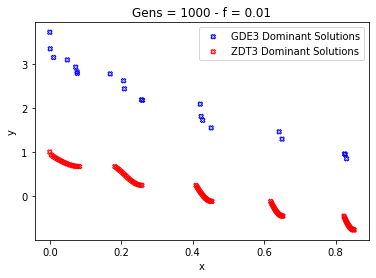

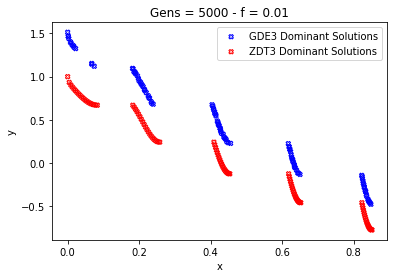

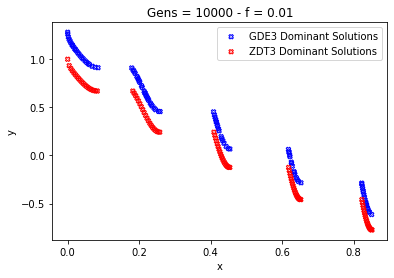

In [41]:
zdt3_gde3_test(num_generations=1000, convergency_rate=0.01)
zdt3_gde3_test(num_generations=5000, convergency_rate=0.01)
zdt3_gde3_test(num_generations=10000, convergency_rate=0.01)

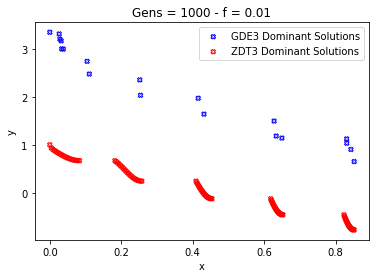

In [40]:
zdt3_gde3_test(num_generations=1000, convergency_rate=0.01)
zdt3_gde3_test(num_generations=1000, convergency_rate=0.1)
zdt3_gde3_test(num_generations=1000, convergency_rate=0.5)
zdt3_gde3_test(num_generations=1000, convergency_rate=0.9)

zdt3_gde3_test(num_generations=5000, convergency_rate=0.01)
zdt3_gde3_test(num_generations=5000, convergency_rate=0.1)
zdt3_gde3_test(num_generations=5000, convergency_rate=0.5)
zdt3_gde3_test(num_generations=5000, convergency_rate=0.9)

zdt3_gde3_test(num_generations=10000, convergency_rate=0.01)
zdt3_gde3_test(num_generations=10000, convergency_rate=0.1)
zdt3_gde3_test(num_generations=10000, convergency_rate=0.5)
zdt3_gde3_test(num_generations=10000, convergency_rate=0.9)